# Graph Coarsening

Please use python version <=3.12 because "cplex" library is not compatible with higher versions

In [1]:
# Importing required packages from Src
%pip install -e ../Src --q

Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Legacy editable install of QuantumLogistics==0.1.0 from file:///C:/Users/USER/Documents/GitHub/Quantum-Vehicle-Routing-Problems/Src (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


In [2]:
# Importing Libraries

import numpy as np
from time import time
import csv, os
import matplotlib.pyplot as plt

from QuantumLogistics import logisticsGraph, Route, StandardRouteSolver, ILPPulpEncoder, GurobiSolver, CBCSolver, DeltaCoarseningEngine, CompositeRouteSolver
from QuantumLogistics.LogisticsRoute.VrpRepGraph import vrpRepGraph

In [3]:
# Loading the data

project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(project_root, "Data", "Global_Datasets", "Christofides")

cmt_file = 'CMT01.xml'
file_path = os.path.join(data_dir, cmt_file)

print(f"[i] Loading graph file {file_path}...")
logistics_network = vrpRepGraph(file_path)
logistics_network.generate_graph()

print("[i] Graph loaded successfully!")

[i] Loading graph file c:\Users\USER\Documents\GitHub\Quantum-Vehicle-Routing-Problems\Data\Global_Datasets\Christofides\CMT01.xml...
[i] Graph loaded successfully!


In [4]:
# Graph & Config

print(f'[[i] Setting graph configurations for {cmt_file}...')
number_of_nodes = logistics_network.n
truck_capacity = max(logistics_network.nodeCapacities)
depot_node = logistics_network.nodelist.vehicle['arrival_node']

print(f'[i] Number of nodes: {number_of_nodes}')
print(f'[i] Truck Capacity: {truck_capacity}')
print(f'[i] Depot Node: {depot_node}')

# Define the route configuration
number_trucks = 5 # From CMTDetails dictionary for CMT01
route_config = {'vehicles': number_trucks, 'depot': depot_node, 'truckCapacity': truck_capacity}

# Define the coarsening configuration
coarsening_rate = 0.7 # Let's try a rate of 0.7
coarsen_config = {'coarsenRate': coarsening_rate, 'radiusCoefficient': 0.2}
coarsening_engine = DeltaCoarseningEngine(**coarsen_config)

# Create the Route object
route = Route(logistics_network, coarseningEngine=coarsening_engine, **route_config)
route.coarsen = (coarsening_rate < 1.0)

[[i] Setting graph configurations for CMT01.xml...
[i] Number of nodes: 51
[i] Truck Capacity: 160.0
[i] Depot Node: 0


In [5]:
# Solving

# Define the solver we want to use (ILP with CBC backend)
encoder = ILPPulpEncoder()
solver_alg = CBCSolver()
solver = StandardRouteSolver(encoder, solver_alg)

solver_config = {"timeLimit": 300} # Time limit in seconds

print("[i] Solving the route...")
solved_route, solve_time, cost = solver.solve(route, config=solver_config)

print(f"[i] Solved in {solve_time:.2f} seconds with a total cost of {cost:.2f}")

[i] Solving the route...
Coarsening Graph now
Final coarse graph has 35 nodes
--- Debugging CompositeRouteSolver.solve ---
Starting problem encoding
"Status:", Optimal
The Objective function Value is: 934.615
problemSol from solveAlgorithm: [  0.   1.   0. ... 118. 138.  64.]
routeSol from extractSolution: [[(0, 1), (1, 7), (7, 31), (31, 29), (29, 11), (11, 6), (6, 0)], [(0, 4), (4, 12), (12, 30), (30, 34), (34, 8), (8, 5), (5, 0)], [(0, 18), (18, 2), (2, 10), (10, 22), (22, 17), (17, 25), (25, 9), (9, 21), (21, 0)], [(0, 19), (19, 33), (33, 20), (20, 23), (23, 16), (16, 13), (13, 0)], [(0, 24), (24, 27), (27, 32), (32, 14), (14, 3), (3, 26), (26, 28), (28, 15), (15, 0)]]
[i] Solved in 299.26 seconds with a total cost of 1014.44


[i] Visualizing the solution...
--- Debugging visualiseSolution ---
Number of routes: 5
Route solution: [[(np.int64(0), np.int64(32)), (np.int64(32), np.int64(1)), (np.int64(1), np.int64(27)), (np.int64(27), np.int64(23)), (np.int64(23), np.int64(7)), (np.int64(7), np.int64(43)), (np.int64(43), np.int64(41)), (np.int64(41), np.int64(38)), (np.int64(38), np.int64(11)), (np.int64(11), np.int64(6)), (np.int64(6), np.int64(0))], [(np.int64(0), np.int64(18)), (np.int64(18), np.int64(4)), (np.int64(4), np.int64(13)), (np.int64(13), np.int64(42)), (np.int64(42), np.int64(48)), (np.int64(48), np.int64(26)), (np.int64(26), np.int64(8)), (np.int64(8), np.int64(5)), (np.int64(5), np.int64(0))], [(np.int64(0), np.int64(22)), (np.int64(22), np.int64(2)), (np.int64(2), np.int64(49)), (np.int64(49), np.int64(10)), (np.int64(10), np.int64(30)), (np.int64(30), np.int64(21)), (np.int64(21), np.int64(34)), (np.int64(34), np.int64(50)), (np.int64(50), np.int64(9)), (np.int64(9), np.int64(16)), (np.int64(1

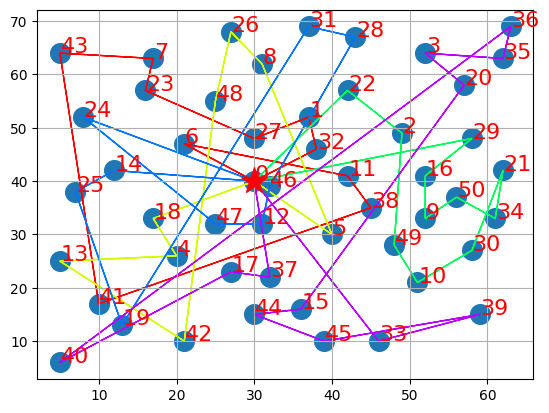

--- Finished debugging visualiseSolution ---


In [6]:
# Visualizating

print("[i] Visualizing the solution...")
# Set the plot to be displayed inline in the notebook
%matplotlib inline
route.visualiseSolution(solved_route)

%pip install qiskit_aer qiskit_algorithms --q

BQM-based Solvers (DBSCAN and SPS)
This notebook demonstrates how to use the DBSCANSolver and SolutionPartitionSolver from the AsishMandoi directory. These solvers are based on a BQM formulation of the Vehicle Routing Problem.

DBSCAN Solver The DBSCAN solver first clusters the nodes using the DBSCAN algorithm and then solves a TSP for each cluster.

Solution Partitioning Solver (SPS) The SPS solver first solves the VRP as a single TSP, and then partitions the resulting tour into multiple routes for the vehicles.

--- Running DBSCAN Solver ---
[[1, 2, 3, 4, 5, 7, 8, 9, 10], [6]]
Optimized Cost: 226.44844340905547


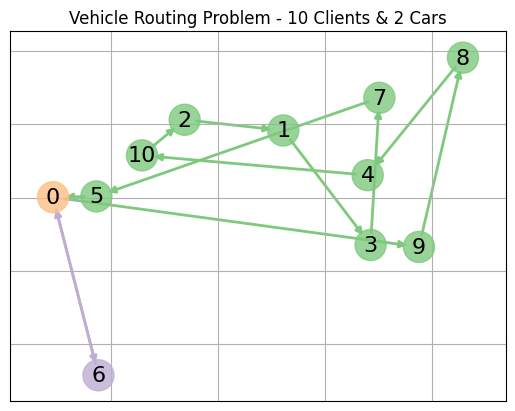

--- Running Solution Partitioning Solver (SPS) ---
Optimized Cost: 204.38511424156133


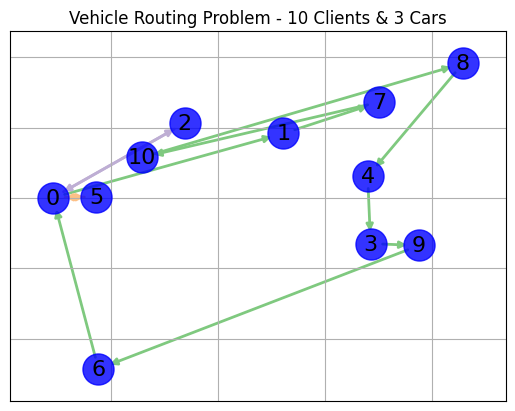

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add the path to the AsishMandoi directory to the system path
# IMPORTANT: Adjust this path to the correct location of the AsishMandoi directory
asish_mandoi_path = 'c:\\Users\\USER\\Documents\\GitHub\\Quantum-Vehicle-Routing-Problems\\Delete this before uploading\\AsishMandoi VRP-explorations main VRP-quantum_BQM_based'
if asish_mandoi_path not in sys.path:
    sys.path.append(asish_mandoi_path)

from utility import generate_vrp_instance
from solution_partition_solver import SolutionPartitionSolver
from dbscan_solver import DBSCANSolver

# Problem parameters
n = 10  # Number of clients
m = 3   # Number of vehicles
seed = 1234

# Generate a VRP instance
instance, xc, yc = generate_vrp_instance(n, seed)

# --- DBSCAN Solver ---
print("--- Running DBSCAN Solver ---")
dbscan_solver = DBSCANSolver(n, m, instance)
dbscan_solver.solve(solver='neal')
print(f"Optimized Cost: {dbscan_solver.evaluate_vrp_cost()}")
dbscan_solver.visualize(xc, yc)

# --- Solution Partitioning Solver (SPS) ---
print("--- Running Solution Partitioning Solver (SPS) ---")
sps_solver = SolutionPartitionSolver(n, m, instance)
sps_solver.solve(solver='neal')
print(f"Optimized Cost: {sps_solver.evaluate_vrp_cost()}")
sps_solver.visualize(xc, yc)

In [8]:
# BQM Solver with Graph Coarsening

import sys
asish_mandoi_path = 'c:\\Users\\USER\\Documents\\GitHub\\Quantum-Vehicle-Routing-Problems\\Delete this before uploading\\AsishMandoi VRP-explorations main VRP-quantum_BQM_based'
if asish_mandoi_path not in sys.path:
    sys.path.append(asish_mandoi_path)

from solution_partition_solver import SolutionPartitionSolver
from dbscan_solver import DBSCANSolver
import networkx as nx

# After running the ILP solver, the route object contains the coarsened graph.
# We can now use this coarsened graph with the BQM-based solvers.
# Note: The ILP solver cell must be executed before this cell.

# Extract the necessary information from the route object
coarsened_graph_pygsp = route.graph
n_clients = coarsened_graph_pygsp.N - 1 # Number of clients (excluding depot)
n_vehicles = route.vehicles
cost_matrix = coarsened_graph_pygsp.W.toarray()

# The AsishMandoi solvers expect the number of clients, not nodes.
# They also assume depot is at index 0.

# --- DBSCAN Solver on Coarsened Graph ---
print("--- Running DBSCAN Solver on Coarsened Graph ---")
dbscan_solver_coarsened = DBSCANSolver(n_clients, n_vehicles, cost_matrix)
dbscan_solver_coarsened.solve(solver='neal')
print(f"Optimized Cost: {dbscan_solver_coarsened.evaluate_vrp_cost()}")

# --- Solution Partitioning Solver (SPS) on Coarsened Graph ---
print("--- Running Solution Partitioning Solver (SPS) on Coarsened Graph ---")
sps_solver_coarsened = SolutionPartitionSolver(n_clients, n_vehicles, cost_matrix)
sps_solver_coarsened.solve(solver='neal')
print(f"Optimized Cost: {sps_solver_coarsened.evaluate_vrp_cost()}")

--- Running DBSCAN Solver on Coarsened Graph ---
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 44, 45, 46, 47, 48, 49, 50], [13, 19, 41, 42], [14, 25], [40], [43]]
Optimized Cost: 1630.1622467041016
--- Running Solution Partitioning Solver (SPS) on Coarsened Graph ---
Optimized Cost: 1699.1454664478365


In [9]:
solved_route_bqm = sps_solver_coarsened.solve(solver='neal')

In [10]:
# Visualizating

print("[i] Visualizing the solution...")
# Set the plot to be displayed inline in the notebook
%matplotlib inline
route.visualiseSolution(solved_route_bqm)

[i] Visualizing the solution...
--- Debugging visualiseSolution ---
--- ERROR in visualiseSolution ---
Exception type: <class 'TypeError'>
Exception message: object of type 'NoneType' has no len()
Traceback (most recent call last):
  File "C:\Users\USER\Documents\GitHub\Quantum-Vehicle-Routing-Problems\Src\QuantumLogistics\LogisticsRoute\LogisticsRoute.py", line 49, in visualiseSolution
    print(f"Number of routes: {len(routes)}")
                               ^^^^^^^^^^^
TypeError: object of type 'NoneType' has no len()

